In [114]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
lh = pd.read_csv('LakeHuron.csv')
lh

Unnamed: 0  time   value
0            1  1875  580.38
1            2  1876  581.86
2            3  1877  580.97
3            4  1878  580.80
4            5  1879  579.79
..         ...   ...     ...
93          94  1968  578.52
94          95  1969  579.74
95          96  1970  579.31
96          97  1971  579.89
97          98  1972  579.96

[98 rows x 3 columns]

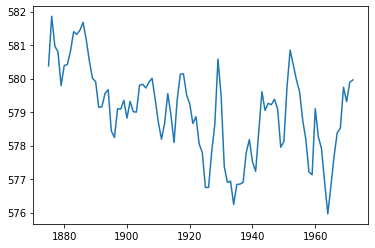

In [116]:
lh_X = lh[['time']]
lh_Y = lh['value']
plt.plot(lh_X, lh_Y)

In [117]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression(fit_intercept=True)
model_lin.fit(lh_X, lh_Y)
print(f"Coef: {model_lin.coef_} Intercept: {model_lin.intercept_}")

Coef: [-0.02420111] Intercept: 625.5549179146824


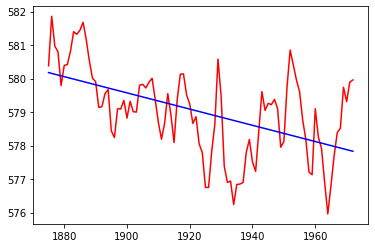

In [118]:
lh_lin = model_lin.predict(lh_X)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# plot the function
plt.plot(lh_X, lh_Y, 'r')
plt.plot(lh_X, lh_lin, 'b')
# show the plot
plt.show()

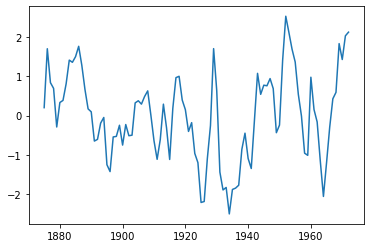

In [119]:
lh_detrend = lh_Y - lh_lin
plt.plot(lh_X, lh_detrend)

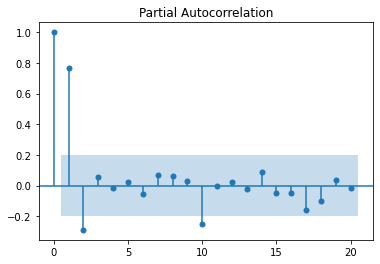

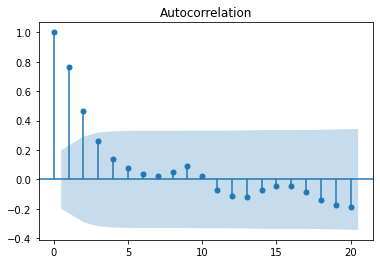

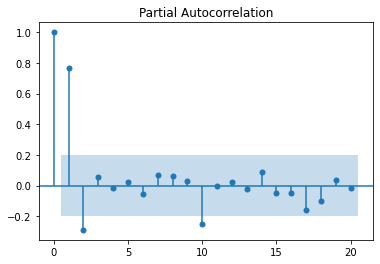

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(lh_detrend)
plot_pacf(lh_detrend)

In [121]:
# Interpretation:
# 3 Spitzen bei PACF -> MA(3)?
# 3 Spitzen bei ACF -> AR(3)?
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

models = []
for ar in range(0, 5):
    for ma in range(0, 5):
        arima_model = ARIMA(lh_detrend, order=(ar, 0, ma))
        model = arima_model.fit()
        warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
        warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
        #mse = mean_squared_error(lh_detrend, model.predict(lh_X))
        models.append({"ar": ar, "ma": ma, "sigma2": model.sigma2, "aic": model.aic, "bic": model.bic})
                       #"mse": mse})

        

C:\Users\Steffen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Steffen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

C:\Users\Steffen\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Steffen\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [123]:
import pprint
pprint.pprint(models)

[{'aic': 304.09565423406923,
  'ar': 0,
  'bic': 309.26558919141036,
  'ma': 0,
  'sigma2': 1.2514757901041254},
 {'aic': 235.20321025269652,
  'ar': 0,
  'bic': 242.95811268870824,
  'ma': 1,
  'sigma2': 0.6012646206982901},
 {'aic': 217.81769063545846,
  'ar': 0,
  'bic': 228.15756055014074,
  'ma': 2,
  'sigma2': 0.4929763731153312},
 {'aic': 213.46483685718363,
  'ar': 0,
  'bic': 226.38967425053647,
  'ma': 3,
  'sigma2': 0.4614317429216503},
 {'aic': 214.9493491070285,
  'ar': 0,
  'bic': 230.45915397905193,
  'ma': 4,
  'sigma2': 0.4591699695079762},
 {'aic': 216.58348197190028,
  'ar': 1,
  'bic': 224.338384407912,
  'ma': 0,
  'sigma2': 0.49720603697647187},
 {'aic': 210.51758129872428,
  'ar': 1,
  'bic': 220.85745121340656,
  'ma': 1,
  'sigma2': 0.45718114767276635},
 {'aic': 212.1225398334287,
  'ar': 1,
  'bic': 225.04737722678158,
  'ma': 2,
  'sigma2': 0.45528600652407875},
 {'aic': 214.12228589580673,
  'ar': 1,
  'bic': 229.63209076783016,
  'ma': 3,
  'sigma2': 0.455

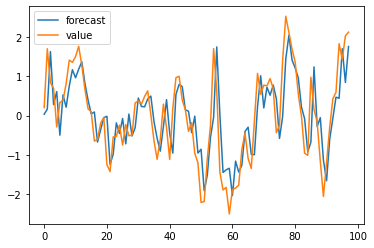

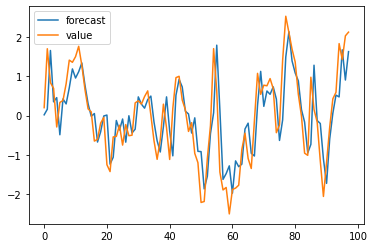

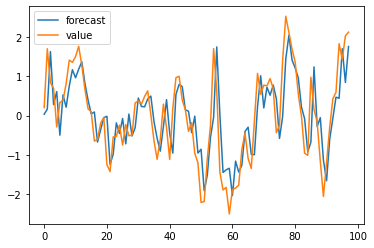

In [124]:
# AR(2) has lowest aic, bic
arima_model = ARIMA(lh_detrend, order=(2, 0, 0))
ar2_model = arima_model.fit()

arima_model = ARIMA(lh_detrend, order=(1, 0, 1))
arma11_model = arima_model.fit()

ar2_model.plot_predict(dynamic=False)
arma11_model.plot_predict(dynamic=False)

In [133]:
# Check for unit root test
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(lh_Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
result = kpss(lh_Y)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.897668
p-value: 0.002052
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
KPSS Statistic: 0.493958
p-value: 0.043027


C:\Users\Steffen\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


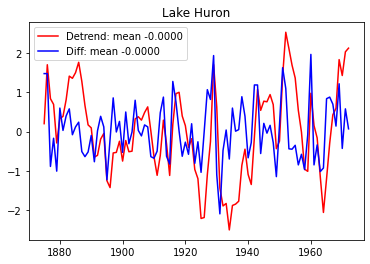

In [134]:
# diff time-series
lh_diff = lh_Y.diff()
lh_diff[0] = lh_diff[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.set_title(f"Lake Huron")
plt.plot(lh_X, lh_detrend, 'r', label=f'Detrend: mean {lh_detrend.mean():.4f}')
plt.plot(lh_X, lh_diff, 'b', label=f'Diff: mean {lh_detrend.mean():.4f}')
ax.legend()
#Diff sieht eher stationär aus

In [135]:
result = adfuller(lh_detrend)
print('###### DETREND ######')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
result = adfuller(lh_diff)
print('###### DIFF ######')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

###### DETREND ######
ADF Statistic: -4.211264
p-value: 0.000631
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
###### DIFF ######
ADF Statistic: -8.375899
p-value: 0.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


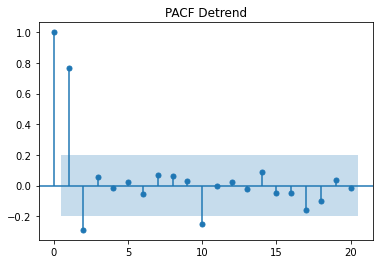

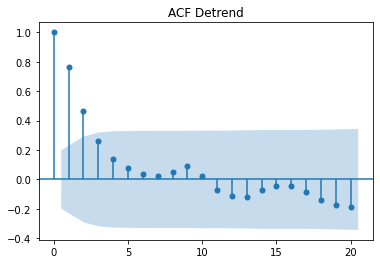

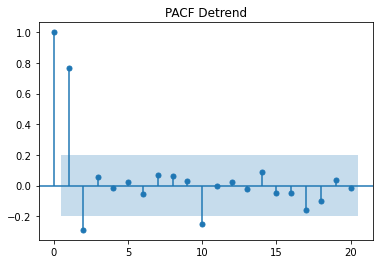

In [128]:
plot_acf(lh_detrend, title="ACF Detrend")
plot_pacf(lh_detrend, title="PACF Detrend")
# Detrend kann noch durch einen ARMA Prozess modelliert werden

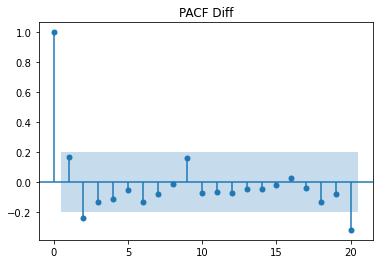

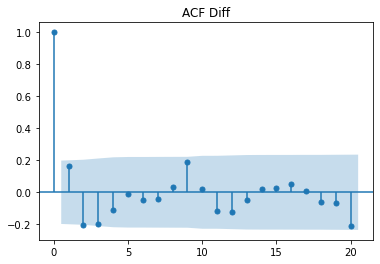

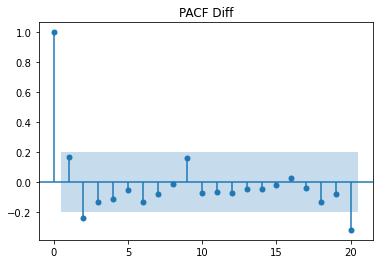

In [136]:
plot_acf(lh_diff, title="ACF Diff")
plot_pacf(lh_diff, title="PACF Diff")
# Diff kann nur noch durch white noise o.ä. modelliert werden